In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

In [2]:
(train_images, train_labels),(test_images, test_labels) = data.load_data()
print(train_labels[0])

9


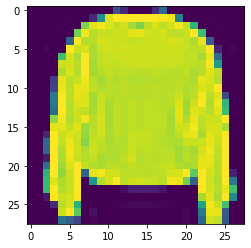

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[7]) 
plt.show()

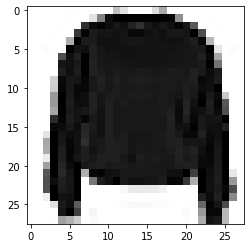

In [4]:
train_images=train_images/255.0   #normalize data
test_images=test_images/255.0
plt.imshow(train_images[7],cmap=plt.cm.binary)  # displays pic in B/W format
plt.show()

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(train_images,train_labels,epochs=5)  #epochs = 5
test_loss, test_acc = model.evaluate(test_images,test_labels)
print("tested Accuracy:", test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4982 - accuracy: 0.8241
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3735 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3363 - accuracy: 0.8769
Epoch 4/5
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3120 - accuracy: 0.8849
Epoch 5/5
10000/10000 [==============================] - 0s 33us/sample - loss: 0.3571 - accuracy: 0.8714
tested Accuracy: 0.8714


In [7]:
prediction = model.predict(test_images)
prediction

array([[2.92192681e-06, 2.32245256e-07, 2.47009897e-08, ...,
        6.94698235e-03, 2.77525196e-05, 9.26040053e-01],
       [6.02976033e-05, 8.17353048e-14, 9.98507440e-01, ...,
        9.36513338e-15, 7.14557036e-09, 7.52984567e-12],
       [3.21055923e-05, 9.99964714e-01, 2.37518961e-07, ...,
        1.02745685e-16, 1.47320804e-08, 4.26948364e-12],
       ...,
       [1.24155194e-03, 1.39546963e-09, 1.52472581e-04, ...,
        3.90566939e-08, 9.98259008e-01, 2.99412474e-11],
       [2.93357130e-06, 9.99883890e-01, 1.40891672e-08, ...,
        2.21342940e-14, 1.11025038e-08, 5.54966162e-09],
       [9.91390771e-05, 1.67370831e-06, 5.17942608e-05, ...,
        1.59789633e-03, 1.90028606e-03, 2.95575883e-05]], dtype=float32)

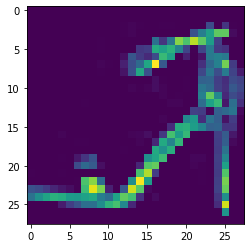

In [28]:
plt.imshow(train_images[8]) 
plt.show()

In [29]:
class_names[np.argmax(prediction[8])]

'Sandal'

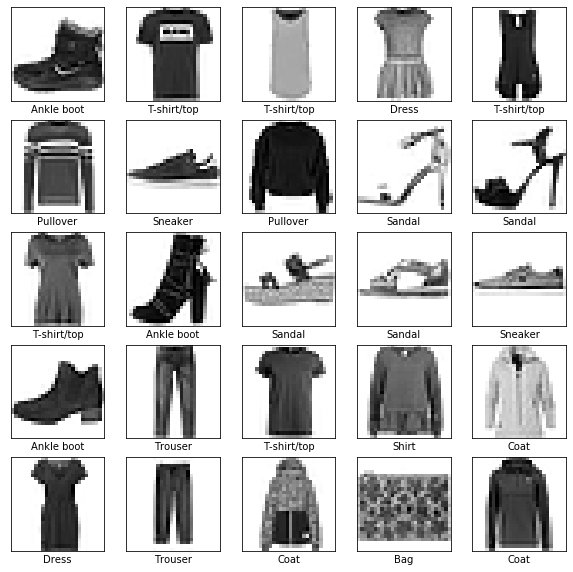

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()